In [44]:
#imports
import pandas as pd
import numpy as np

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# ml preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# ml models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# ml evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [45]:
# load the data
data_path = 'Datasets/2021-2023/CSB_2021-2023_Daily_Weather.csv'
weather_data = pd.read_csv(data_path)

In [46]:
# convert Date to datetime
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

In [47]:
# add day of week and weekend data
weather_data['day_of_week'] = weather_data['Date'].dt.dayofweek
weather_data['is_weekend'] = weather_data['Date'].dt.dayofweek > 4

In [48]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            911 non-null    datetime64[ns]
 1   Casual                          911 non-null    int64         
 2   Member                          911 non-null    int64         
 3   Total_rides                     911 non-null    int64         
 4   weathercode (wmo code)          911 non-null    int64         
 5   temperature_2m_mean (°C)        911 non-null    float64       
 6   apparent_temperature_mean (°C)  911 non-null    float64       
 7   windspeed_10m_max (km/h)        911 non-null    float64       
 8   day_of_week                     911 non-null    int32         
 9   is_weekend                      911 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int32(1), int64(4)
memory usage

In [49]:
weather_data.isna().sum()

Date                              0
Casual                            0
Member                            0
Total_rides                       0
weathercode (wmo code)            0
temperature_2m_mean (°C)          0
apparent_temperature_mean (°C)    0
windspeed_10m_max (km/h)          0
day_of_week                       0
is_weekend                        0
dtype: int64

In [50]:
weather_data.dropna(inplace=True)

In [51]:
weather_data.describe()

,Date,Casual,Member,Total_rides,weathercode (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),day_of_week
count,911,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,2022-04-01 00:00:00,3607.552141,5372.278814,8979.830955,28.105379,14.019868,12.792536,15.684852,3.001098
min,2021-01-01 00:00:00,174.000000,323.000000,497.000000,0.000000,-9.100000,-15.200000,5.600000,0.000000
25%,2021-08-16 12:00:00,1909.500000,3908.000000,6240.500000,2.000000,6.600000,2.900000,11.700000,1.000000
50%,2022-04-01 00:00:00,3336.000000,5411.000000,8991.000000,3.000000,14.300000,12.500000,14.500000,3.000000
75%,2022-11-14 12:00:00,5004.000000,6843.500000,11926.500000,55.000000,22.000000,22.800000,18.900000,5.000000
max,2023-06-30 00:00:00,12839.000000,10657.000000,19531.000000,75.000000,30.100000,34.700000,36.700000,6.000000
std,NaN,2087.382795,2046.922096,3778.061891,28.319602,8.953601,11.632842,5.444250,2.000274


In [52]:
weather_data

,Date,Casual,Member,Total_rides,weathercode (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),day_of_week,is_weekend
0,2021-01-01,371,590,961,63,2.3,-0.9,10.6,4,False
1,2021-01-02,2874,2844,5718,61,7.6,4.8,19.1,5,True
2,2021-01-03,495,1133,1628,63,3.9,0.9,13.0,6,True
3,2021-01-04,907,2074,2981,3,4.1,1.0,13.3,0,False
4,2021-01-05,1057,2004,3061,51,4.0,1.4,9.2,1,False
...,...,...,...,...,...,...,...,...,...,...
906,2023-06-26,4602,8373,12975,63,25.3,28.8,10.7,0,False
907,2023-06-27,4305,8542,12847,63,23.7,26.9,14.4,1,False
908,2023-06-28,5691,10150,15841,3,22.8,23.6,16.0,2,False
909,2023-06-29,5009,8807,13816,1,23.6,25.2,9.2,3,False


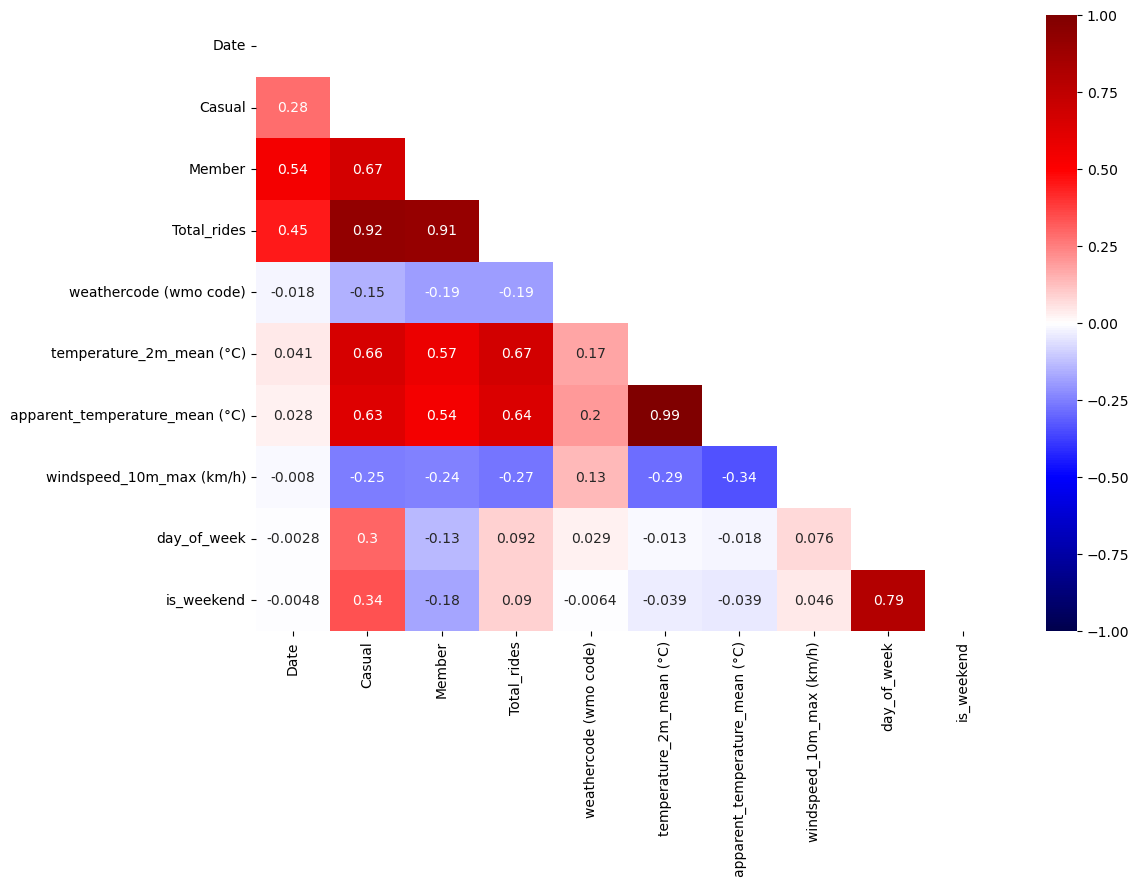

In [53]:
# plot correlation matrix for the df
plt.figure(figsize=(12,8))
corr= weather_data.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

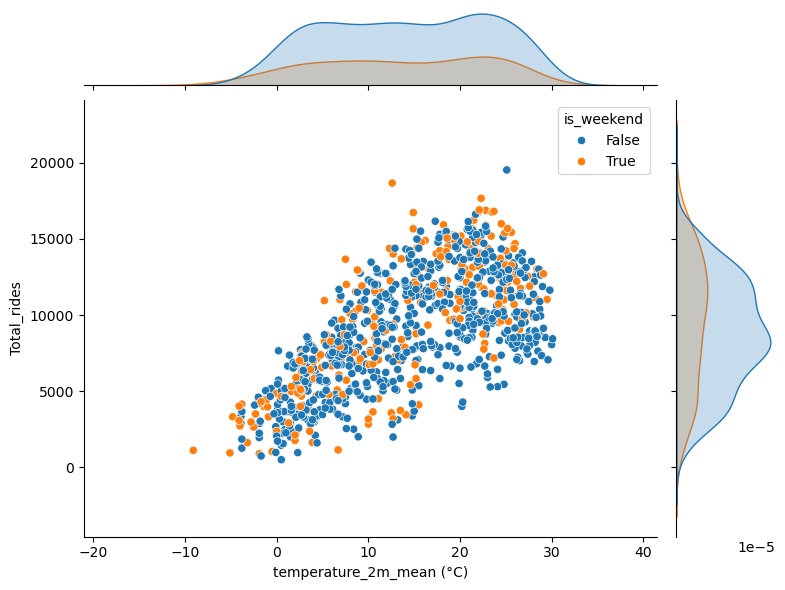

In [54]:
# set the width and height of the joint plot
width, height = 8, 6

# plot the total rides and temperature
joint_plot = sns.jointplot(x='temperature_2m_mean (°C)', y='Total_rides', hue='is_weekend', data=weather_data, height=height, ratio=5)

# adjust the size of the figure
joint_plot.fig.set_figwidth(width)
joint_plot.fig.set_figheight(height)

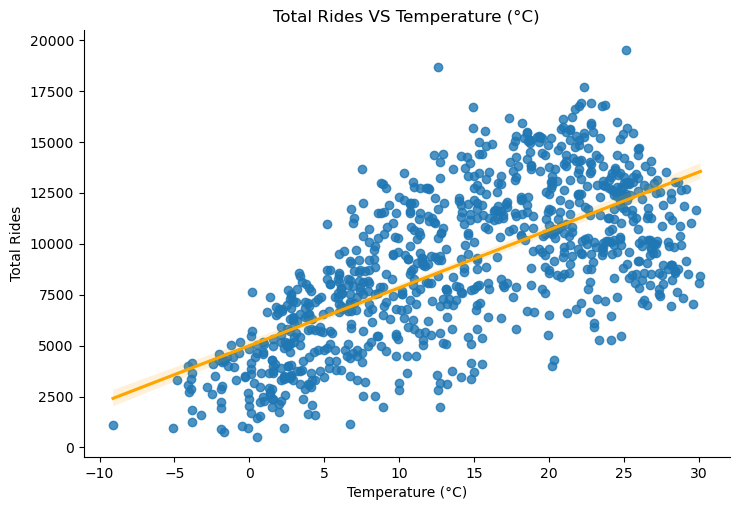

In [55]:
# create a scatter plot of total rides and temperature, with a regression line fitted to the data
sns.lmplot(x='temperature_2m_mean (°C)', y='Total_rides', data=weather_data, line_kws={'color': 'orange'}, aspect=1.5)

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')

plt.show()

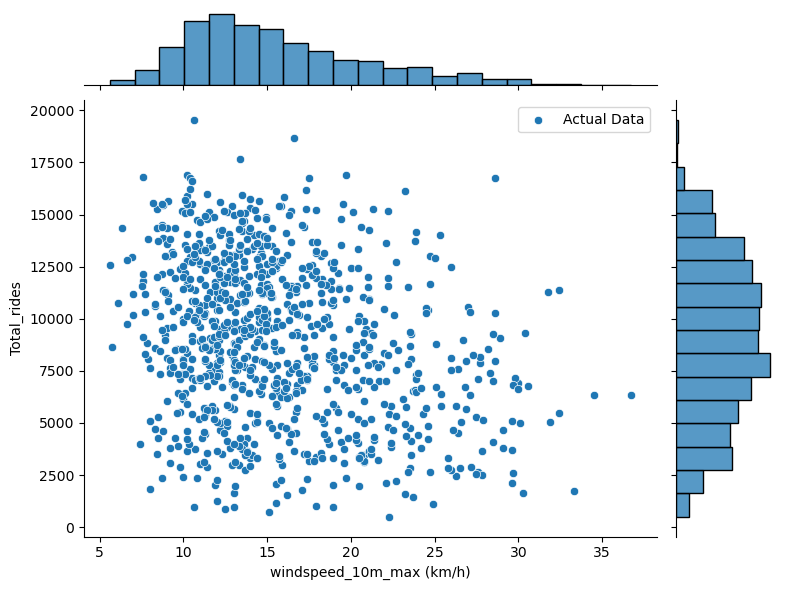

In [56]:
# set the width and height of the joint plot
width, height = 8, 6

# plot the total rides and temperature
joint_plot = sns.jointplot(x='windspeed_10m_max (km/h)', y='Total_rides', data=weather_data, label='Actual Data', height=height, ratio=5)

# adjust the size of the figure
joint_plot.fig.set_figwidth(width)
joint_plot.fig.set_figheight(height)

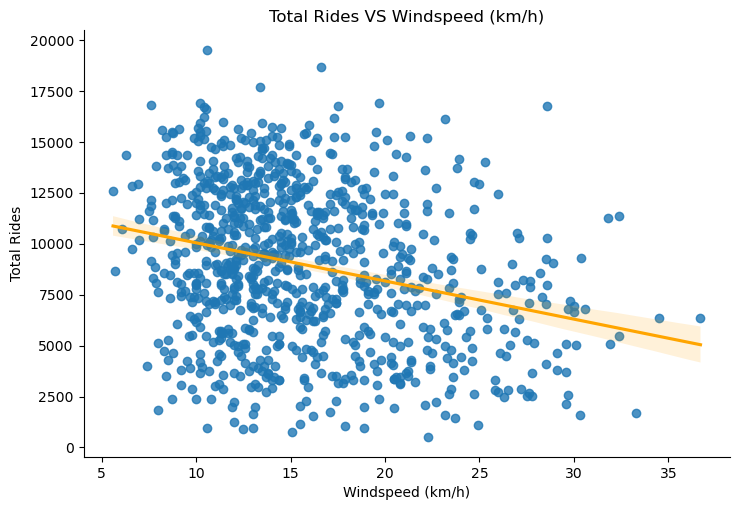

In [57]:
# create a scatter plot of total rides and temperature, with a regression line fitted to the data
sns.lmplot(x='windspeed_10m_max (km/h)', y='Total_rides', data=weather_data, line_kws={'color': 'orange'}, aspect=1.5)

# set plot labels and title
plt.title("Total Rides VS Windspeed (km/h)")
plt.xlabel('Windspeed (km/h)')
plt.ylabel('Total Rides')

plt.show()

In [58]:
# split the data into features (X) and target variable (y)
X = weather_data[['temperature_2m_mean (°C)', 'windspeed_10m_max (km/h)', 'is_weekend']] # features
y = weather_data['Total_rides']  # target variable

In [59]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# initialize the Linear Regression model
lr_rides_temp = LinearRegression()

# train the model
lr_rides_temp.fit(X_train, y_train)

LinearRegression()

In [61]:
# make predictions on the test set
y_pred = lr_rides_temp.predict(X_test)

In [62]:
def evaluate_regression_model(y_test, y_pred):

    # calculate evaluation metrics
    mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
    #squared True returns MSE value, False returns RMSE value.
    mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
    rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
    r2 = r2_score(y_true=y_test, y_pred=y_pred)
    
    # return the metrics as a dictionary
    evaluation_dict = {
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R^2': round(r2, 2)
    }

    return evaluation_dict

In [63]:
result_dict = evaluate_regression_model(y_test, y_pred)
result_df = pd.DataFrame.from_dict(result_dict, orient='index', columns=['Value'])
result_df

,Value
MAE,2255.89
MSE,7331487.63
RMSE,2707.67
R^2,0.52


In [64]:
predictions = X_test.copy()
predictions['prediction'] = y_pred
predictions.sort_values(by='windspeed_10m_max (km/h)', inplace=True)

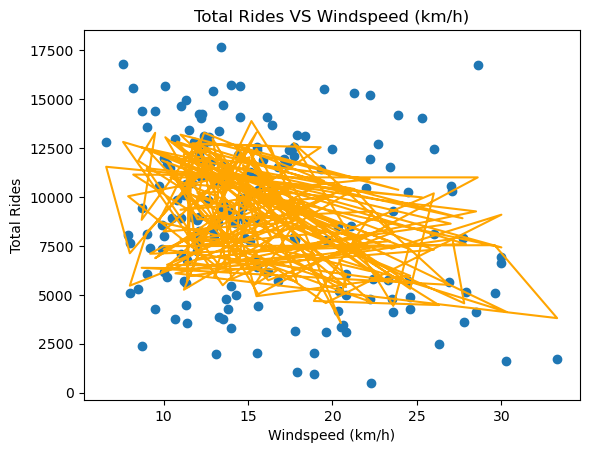

In [65]:
# plot the total rides and windspeed
plt.scatter(X_test['windspeed_10m_max (km/h)'], y_test)

# plot the regression line
plt.plot(X_test['windspeed_10m_max (km/h)'], y_pred, color="orange")

# set plot labels and title
plt.title("Total Rides VS Windspeed (km/h)")
plt.xlabel('Windspeed (km/h)')
plt.ylabel('Total Rides')

plt.show()

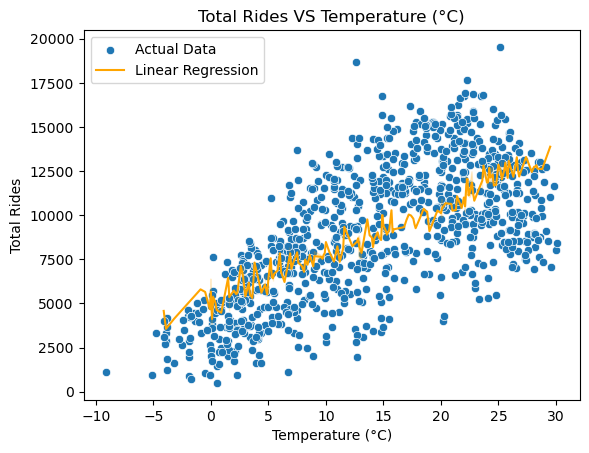

In [66]:
# scatter plot of the actual data points
sns.scatterplot(x='temperature_2m_mean (°C)',y='Total_rides', data=weather_data, label='Actual Data')

# overlay the linear regression line
sns.lineplot(x='temperature_2m_mean (°C)', y='prediction', data=predictions, color='orange', label='Linear Regression')

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')

# Show the plot
plt.legend()
plt.show()


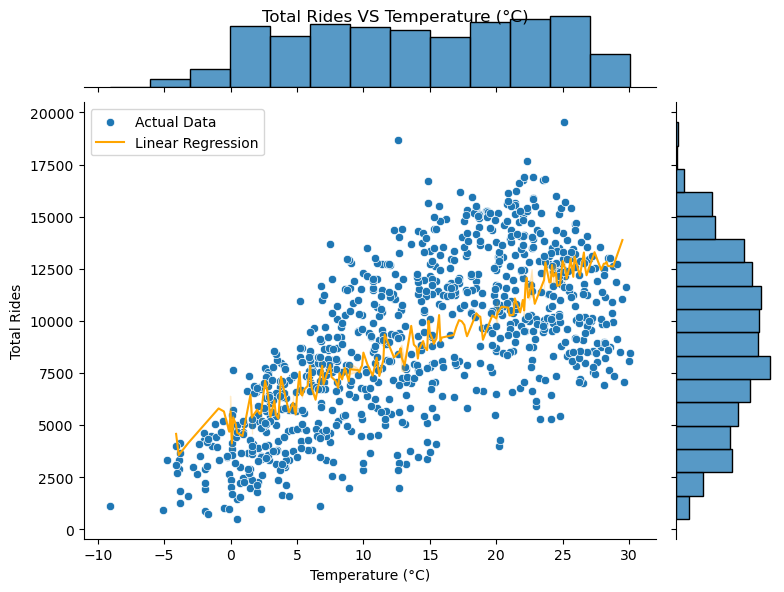

In [67]:
# set the width and height of the joint plot
width, height = 8, 6

# scatter plot of the actual data points
joint_plot = sns.jointplot(x='temperature_2m_mean (°C)',y='Total_rides', data=weather_data, label='Actual Data', height=height, ratio=5)

# overlay the linear regression line
sns.lineplot(x='temperature_2m_mean (°C)', y='prediction', data=predictions, color='orange', label='Linear Regression')

# set plot labels and title
plt.suptitle("Total Rides VS Temperature (°C)")
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')

# adjust the size of the figure
joint_plot.fig.set_figwidth(width)
joint_plot.fig.set_figheight(height)

# show the plot
plt.legend()
plt.show()

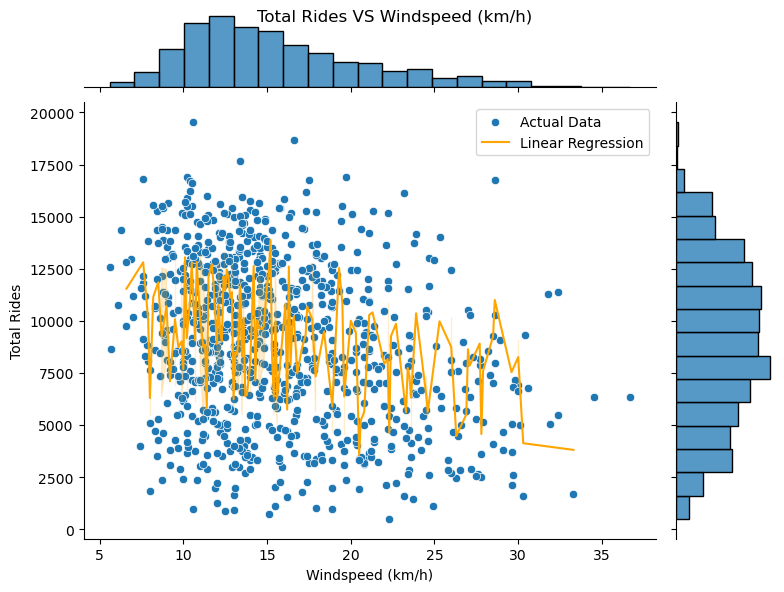

In [68]:
# set the width and height of the joint plot
width, height = 8, 6

# scatter plot of the actual data points
joint_plot = sns.jointplot(x='windspeed_10m_max (km/h)', y='Total_rides', data=weather_data, label='Actual Data', height=height, ratio=5)

# overlay the linear regression line
sns.lineplot(x='windspeed_10m_max (km/h)', y='prediction', data=predictions, color='orange', label='Linear Regression')

# set plot labels and title
plt.suptitle("Total Rides VS Windspeed (km/h)")
plt.xlabel('Windspeed (km/h)')
plt.ylabel('Total Rides')

# adjust the size of the figure
joint_plot.fig.set_figwidth(width)
joint_plot.fig.set_figheight(height)

# show the plot
plt.legend()
plt.show()

In [69]:
# initialize the RandomForestRegressor model
rf_rides_temp = RandomForestRegressor()

# train the model
rf_rides_temp.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
# make predictions on the test set
y_pred = rf_rides_temp.predict(X_test)

In [71]:
result_dict = evaluate_regression_model(y_test, y_pred)
result_df = pd.DataFrame.from_dict(result_dict, orient='index', columns=['Value'])
result_df

,Value
MAE,2207.59
MSE,7346904.16
RMSE,2710.52
R^2,0.52


In [72]:
predictions = X_test.copy()
predictions['prediction'] = y_pred
predictions.sort_values(by='temperature_2m_mean (°C)', inplace=True)

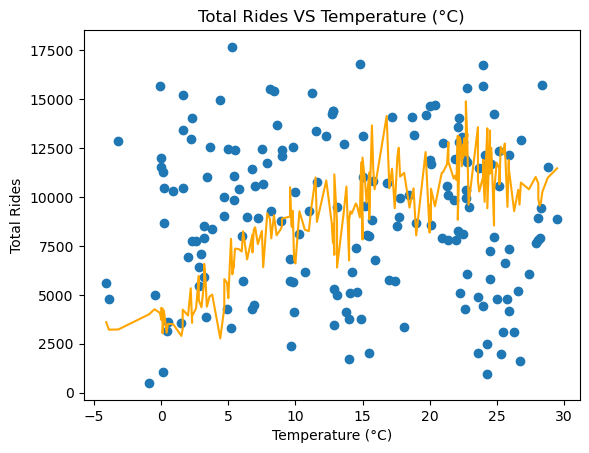

In [73]:
# plot the total rides and temperature
plt.scatter(predictions['temperature_2m_mean (°C)'], y_test)

# plot the regression line
plt.plot(predictions['temperature_2m_mean (°C)'], predictions['prediction'], color="orange")

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')

plt.show()

In [74]:
# transform features to include polynomial terms up to degree 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_train)

# Train a linear regression model using the polynomial features
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)

LinearRegression()

In [75]:
# Generate predictions using the trained model
X_test_poly = poly_features.transform(X_test)
y_pred = poly_regression.predict(X_test_poly)

In [76]:
result_dict = evaluate_regression_model(y_test, y_pred)
result_df = pd.DataFrame.from_dict(result_dict, orient='index', columns=['Value'])
result_df

,Value
MAE,2090.76
MSE,6487687.98
RMSE,2547.09
R^2,0.58


In [77]:
predictions = X_test.copy()
predictions['prediction'] = y_pred
predictions.sort_values(by='temperature_2m_mean (°C)', inplace=True)

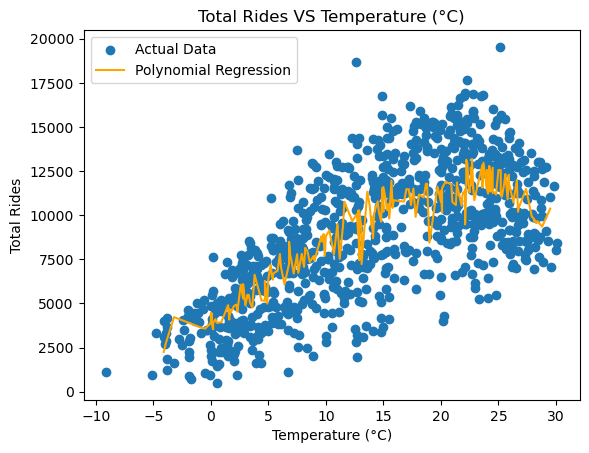

In [78]:
# plot the original data and the polynomial regression line
plt.scatter(X['temperature_2m_mean (°C)'], y, label='Actual Data')
plt.plot(predictions['temperature_2m_mean (°C)'], predictions['prediction'], color='orange', label='Polynomial Regression')

# set plot labels and title
plt.title("Total Rides VS Temperature (°C)")
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')

plt.legend()
plt.show()

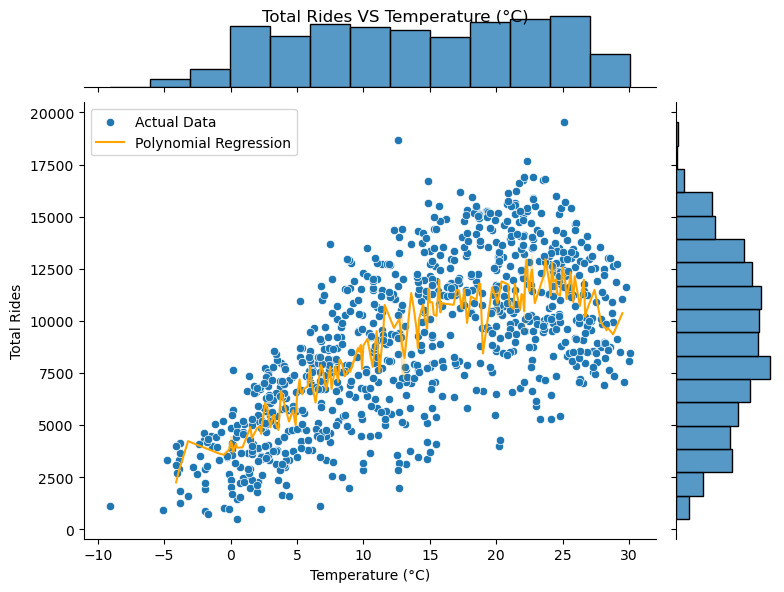

In [79]:
# set the width and height of the joint plot
width, height = 8, 6

# scatter plot of the actual data points
joint_plot = sns.jointplot(x='temperature_2m_mean (°C)', y='Total_rides', data=weather_data, label='Actual Data', height=height, ratio=5)

# overlay the linear regression line
sns.lineplot(x='temperature_2m_mean (°C)', y='prediction', data=predictions, color='orange', label='Polynomial Regression')

# set plot labels and title
plt.suptitle("Total Rides VS Temperature (°C)")
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')

# adjust the size of the figure
joint_plot.fig.set_figwidth(width)
joint_plot.fig.set_figheight(height)

# show the plot
plt.legend()
plt.show()

# Compare

In [80]:
# split the data into features (X) and target variable (y)
X = weather_data[['temperature_2m_mean (°C)', 'windspeed_10m_max (km/h)', 'is_weekend']] # features
y = weather_data['Total_rides']  # target variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# initialize the Linear Regression model
lr = LinearRegression()

# train the model
lr.fit(X_train, y_train)

# make predictions on the test set
y_pred = lr.predict(X_test)

result_dict = evaluate_regression_model(y_test, y_pred)
result_df = pd.DataFrame.from_dict(result_dict, orient='index', columns=['Value'])
result_df

,Value
MAE,2255.89
MSE,7331487.63
RMSE,2707.67
R^2,0.52


In [82]:
# initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# train the model
rf.fit(X_train, y_train)

# make predictions on the test set
y_pred = rf.predict(X_test)

result_dict = evaluate_regression_model(y_test, y_pred)
result_df = pd.DataFrame.from_dict(result_dict, orient='index', columns=['Value'])
result_df

,Value
MAE,2235.32
MSE,7539750.78
RMSE,2745.86
R^2,0.51


In [83]:
# transform features to include polynomial terms up to degree 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_train)

# train a linear regression model using the polynomial features
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)

# make predictions on the test set
X_test_poly = poly_features.transform(X_test)
y_pred = poly_regression.predict(X_test_poly)

result_dict = evaluate_regression_model(y_test, y_pred)
result_df = pd.DataFrame.from_dict(result_dict, orient='index', columns=['Value'])
result_df

,Value
MAE,2090.76
MSE,6487687.98
RMSE,2547.09
R^2,0.58


In [84]:
# transform features to include polynomial terms up to degree 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

# train a linear regression model using the polynomial features
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)

# make predictions on the test set
X_test_poly = poly_features.transform(X_test)
y_pred = poly_regression.predict(X_test_poly)

result_dict = evaluate_regression_model(y_test, y_pred)
result_df = pd.DataFrame.from_dict(result_dict, orient='index', columns=['Value'])
result_df

,Value
MAE,2091.27
MSE,6632030.01
RMSE,2575.27
R^2,0.57


In [85]:
lr = LinearRegression()



In [86]:


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
result_df_lr = evaluate_regression_model(y_test, y_pred_lr)

# RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
result_df_rf = evaluate_regression_model(y_test, y_pred_rf)

# Polynomial Regression (degree=3)
poly_deg_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_deg_3.fit(X_train, y_train)
y_pred_poly_deg_3 = poly_deg_3.predict(X_test)
result_df_poly_deg_3 = evaluate_regression_model(y_test, y_pred_poly_deg_3)

# Polynomial Regression (degree=2)
poly_deg_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_deg_2.fit(X_train, y_train)
y_pred_poly_deg_2 = poly_deg_2.predict(X_test)
result_df_poly_deg_2 = evaluate_regression_model(y_test, y_pred_poly_deg_2)

# Concatenate all result DataFrames
all_results_df = pd.concat(
    [result_df_lr, result_df_rf, result_df_poly_deg_3, result_df_poly_deg_2],
    axis=1,
    keys=['Linear Regression', 'Random Forest', 'Poly Regression (deg=3)', 'Poly Regression (deg=2)']
)

print(all_results_df)


TypeError: cannot concatenate object of type '<class 'dict'>'; only Series and DataFrame objs are valid